<a href="https://colab.research.google.com/github/BeytullahAksoy/emotion-detection-cnn/blob/main/emotion_detection_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 %cd /content/drive/MyDrive/senior-project/CNNs

/content/drive/MyDrive/senior-project/CNNs


In [ ]:
import tensorflow as tf
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

In [ ]:
data = pd.read_csv('fer2013.csv')

In [ ]:
data.shape

(35887, 3)

In [ ]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
data["Usage"].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [ ]:
train_data = data[data.Usage == "Training"]

In [ ]:
train_pixels = train_data.pixels.str.split(" ").tolist()
train_pixels = pd.DataFrame(train_pixels , dtype=int)
train_images = train_pixels.values
train_images = train_images.astype(np.float)

print(train_images)

[[ 70.  80.  82. ... 106. 109.  82.]
 [151. 150. 147. ... 193. 183. 184.]
 [231. 212. 156. ...  88. 110. 152.]
 ...
 [ 74.  81.  87. ... 188. 187. 187.]
 [222. 227. 203. ... 136. 136. 134.]
 [195. 199. 205. ...   6.  15.  38.]]


In [ ]:
def show(img):
  show_image = img.reshape(48,48)
  plt.axis("off")
  plt.imshow(show_image, cmap="gray")

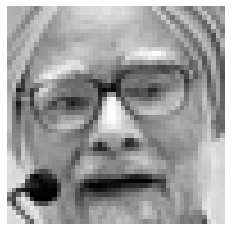

In [ ]:
show(train_images[1])

In [ ]:
train_labels_flat = train_data["emotion"].values.ravel()
train_labels_count = np.unique(train_labels_flat).shape[0]
train_labels_count

7

In [ ]:
def dense_to_one_hot(labels_dense, num_classes):
  num_labels = labels_dense.shape[0]
  
  index_offset = np.arange(num_labels) * num_classes
  labels_one_hot = np.zeros((num_labels, num_classes))
  labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
  return labels_one_hot

In [ ]:
y_train = dense_to_one_hot(train_labels_flat, train_labels_count)
y_train = y_train.astype(np.uint8)
y_train.shape

(28709, 7)

In [ ]:
test_data = data[data.Usage == "PublicTest"]
test_pixels = test_data.pixels.str.split(" ").tolist()

test_pixels = pd.DataFrame(test_pixels, dtype=int)
test_images = test_pixels.values
test_images = test_images.astype(np.float)

print(test_images.shape)

(3589, 2304)


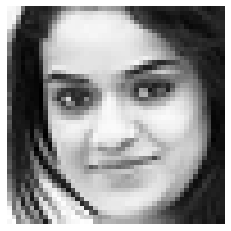

In [ ]:
show(test_images[5])

In [ ]:
test_labels_flat = test_data["emotion"].values.ravel()
test_labels_count = np.unique(test_labels_flat).shape[0]

y_test = dense_to_one_hot(test_labels_flat,test_labels_count)
y_test = y_test.astype(np.uint8)

print(y_test.shape)

(3589, 7)


In [ ]:
num_layers = 3
min_nodes_per_layer, max_nodes_per_layer = 64, 256
node_step_size = 64

In [ ]:
node_options = list(range(
    min_nodes_per_layer,
    max_nodes_per_layer + 1,
    node_step_size


))
node_options

[64, 128, 192, 256]

In [ ]:
layer_possibilities = [node_options] * num_layers
layer_possibilities

[[64, 128, 192, 256], [64, 128, 192, 256], [64, 128, 192, 256]]

In [ ]:
import itertools
layer_node_permutations = list(itertools.product(*layer_possibilities))
layer_node_permutations

[(64, 64, 64),
 (64, 64, 128),
 (64, 64, 192),
 (64, 64, 256),
 (64, 128, 64),
 (64, 128, 128),
 (64, 128, 192),
 (64, 128, 256),
 (64, 192, 64),
 (64, 192, 128),
 (64, 192, 192),
 (64, 192, 256),
 (64, 256, 64),
 (64, 256, 128),
 (64, 256, 192),
 (64, 256, 256),
 (128, 64, 64),
 (128, 64, 128),
 (128, 64, 192),
 (128, 64, 256),
 (128, 128, 64),
 (128, 128, 128),
 (128, 128, 192),
 (128, 128, 256),
 (128, 192, 64),
 (128, 192, 128),
 (128, 192, 192),
 (128, 192, 256),
 (128, 256, 64),
 (128, 256, 128),
 (128, 256, 192),
 (128, 256, 256),
 (192, 64, 64),
 (192, 64, 128),
 (192, 64, 192),
 (192, 64, 256),
 (192, 128, 64),
 (192, 128, 128),
 (192, 128, 192),
 (192, 128, 256),
 (192, 192, 64),
 (192, 192, 128),
 (192, 192, 192),
 (192, 192, 256),
 (192, 256, 64),
 (192, 256, 128),
 (192, 256, 192),
 (192, 256, 256),
 (256, 64, 64),
 (256, 64, 128),
 (256, 64, 192),
 (256, 64, 256),
 (256, 128, 64),
 (256, 128, 128),
 (256, 128, 192),
 (256, 128, 256),
 (256, 192, 64),
 (256, 192, 128),
 (2

In [ ]:
models = []
from keras.layers.normalization.batch_normalization import BatchNormalization
for permutation in layer_node_permutations:
    model = Sequential()
    model.add(Conv2D(64, 3, data_format="channels_last", kernel_initializer="he_normal", input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.6))
    model.add(Activation("relu"))
    model_name = ''
    for nodes_at_layer in permutation:
        model.add(tf.keras.layers.Dense(nodes_at_layer, activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPool2D(pool_size=(2,2), strides=2))
        model.add(Dropout(0.6))
        model_name += f'dense{nodes_at_layer}_'
    model.add(Flatten())
    model.add(Dense(7))
    model.add(Activation("softmax")) 
    
    models.append(model)
for model in models:
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])    

In [ ]:
x_train = train_images.reshape(-1, 48, 48, 1)
x_test = test_images.reshape(-1,48,48,1)

In [ ]:
accuracy_table = [0 for x in range(len(layer_node_permutations)+1)]

In [ ]:
x=-1
for model in models:
  x+=1
  print(x)
  if accuracy_table[x] ==0:
    model.fit( x_train, y_train,  
                        epochs=30,
                        shuffle=True,
                        batch_size=200,
                        validation_data=(x_test, y_test),
                                              verbose=2)
    acc = model.history.history['val_accuracy']
    print(acc)
    accuracy_table[x] = acc
    data = np.array(accuracy_table)
    np.save("accuracy_table.npy", data)
    


0
Epoch 1/30
144/144 - 281s - loss: 3.3084 - accuracy: 0.1997 - val_loss: 2.2609 - val_accuracy: 0.0159 - 281s/epoch - 2s/step
Epoch 2/30
144/144 - 275s - loss: 2.1657 - accuracy: 0.2370 - val_loss: 2.3083 - val_accuracy: 0.0156 - 275s/epoch - 2s/step
Epoch 3/30
144/144 - 275s - loss: 1.9086 - accuracy: 0.2536 - val_loss: 2.0510 - val_accuracy: 0.0847 - 275s/epoch - 2s/step
Epoch 4/30
144/144 - 280s - loss: 1.8220 - accuracy: 0.2759 - val_loss: 1.9545 - val_accuracy: 0.1828 - 280s/epoch - 2s/step
Epoch 5/30
144/144 - 279s - loss: 1.7965 - accuracy: 0.2842 - val_loss: 1.9823 - val_accuracy: 0.1630 - 279s/epoch - 2s/step
Epoch 6/30
144/144 - 281s - loss: 1.7821 - accuracy: 0.2948 - val_loss: 1.8694 - val_accuracy: 0.2561 - 281s/epoch - 2s/step
Epoch 7/30
144/144 - 285s - loss: 1.7679 - accuracy: 0.2990 - val_loss: 1.8897 - val_accuracy: 0.2547 - 285s/epoch - 2s/step
Epoch 8/30
144/144 - 279s - loss: 1.7493 - accuracy: 0.3073 - val_loss: 1.7941 - val_accuracy: 0.2650 - 279s/epoch - 2s/ste